Topic modeling is a type of statistical modeling for discovering the abstract “topics” that occur in a collection of documents. Latent Dirichlet Allocation (LDA) is an example of topic model and is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions.


In [1]:
#To filter the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the basic modules and libraries for data exploration and processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#mounting the drive to the colaboratory
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#reading the excel data file from Drive
df = pd.read_csv('/content/drive/My Drive/flipkart_data_cleaned.csv')

In [8]:
df.head()

,product_name,description,category
0,alisha solid women's cycling shorts,fabric womens additional wash gentle code numb...,clothing
1,fabhomedecor fabric double sofa bed,depth save finish simple applying bruview flip...,furniture
2,aw bellies,casual contents days ideal general manufacture...,footwear
3,alisha solid women's cycling shorts,fabric womens additional wash altght11 gentle ...,clothing
4,sicons all purpose arnica dog shampoo,sicons specifications number sales fashion qua...,pet supplies


# **Method 1**:  Gensim's Latent Dirichlet Allocation algorithm for Topic Modelling.



Topic modelling is an unsupervised approach to model each text entry as a finite mixture over an underlying set of topics. Each topic is a set of word probabilities. Topic modelling thus automatically identifies patterns in text.Here we use Gensim's Latent Dirichlet Allocation algorithm for our topic modelling.

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7MB 8.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.3MB 268kB/s 
     |████████████████████████████████| 9.9MB 47.8MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136870 sha256=2490aeea58c1c10acb9514af82ec3b1f8f2fd95f98649a14cbea40c2e6addae1
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyLDAvis
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0

In [ ]:
#Loading gensim and nltk libraries
import gensim
from gensim import corpora

import pyLDAvis
from gensim.models import LdaMulticore
import seaborn as sns


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
# function to perform lemmatize and stem preprocessing steps on the data set.
import nltk
import spacy
from spacy.lang.en import English

spacy.load('en')
parser = English()

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

en_stop = set(nltk.corpus.stopwords.words('english'))

def prepare_text_for_lda(text):
    tokens = tokenize(text)
    
    # Ignoring words with length of 1
    tokens = [token for token in tokens if len(token) > 1]
    # Ignoring stopwords
    tokens = [token for token in tokens if token not in en_stop]
    return tokens

In [ ]:
maindf['description'] = maindf['description'].apply(prepare_text_for_lda)
text_data = maindf['description'].tolist()

In [ ]:
import pickle

In [ ]:
#we create a dictionary reporting how many words and how many times those words appear
dictionary = corpora.Dictionary(text_data)
doc_term_matrix = [dictionary.doc2bow(word) for word in text_data]

# Build gensim dictionary and bag of words list, required for LDA input

# Save the corpus and dictionary for future usage
pickle.dump(doc_term_matrix, open('corpus_combined.pkl', 'wb'))
dictionary.save('dictionary_combined.gensim')

# Running LDA using Bag of Words

# Train LDA topic model using multi-cores
# Play around with the num_topics parameter 
# and change the number of workers according to your device
num_topics = 30
lda = LdaMulticore(doc_term_matrix, num_topics=num_topics, id2word=dictionary, workers=6)
lda.save('model30.gensim')

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/

In [ ]:
# A glimpse into the top 3 contributing words to each topic
topics = lda.print_topics(num_words=3)
for topic in topics:
    print(topic)

(28, '0.013*"general" + 0.012*"price" + 0.011*"pack"')
(29, '0.023*"flipkartcom" + 0.017*"free" + 0.017*"products"')
(4, '0.017*"online" + 0.016*"price" + 0.011*"collection"')
(23, '0.015*"online" + 0.012*"flipkartcom" + 0.011*"price"')
(20, '0.012*"price" + 0.012*"products" + 0.011*"free"')
(12, '0.024*"online" + 0.021*"flipkartcom" + 0.021*"india"')
(5, '0.015*"products" + 0.014*"delivery" + 0.014*"free"')
(13, '0.019*"free" + 0.019*"genuine" + 0.018*"products"')
(11, '0.026*"flipkartcom" + 0.022*"online" + 0.019*"collection"')
(24, '0.020*"price" + 0.018*"womens" + 0.016*"collection"')
(2, '0.018*"price" + 0.009*"quality" + 0.006*"wear"')
(10, '0.016*"price" + 0.008*"womens" + 0.006*"look"')
(9, '0.016*"color" + 0.015*"material" + 0.014*"price"')
(19, '0.014*"price" + 0.013*"material" + 0.012*"products"')
(18, '0.017*"price" + 0.009*"material" + 0.009*"color"')
(3, '0.018*"general" + 0.013*"type" + 0.013*"pack"')
(25, '0.015*"womens" + 0.014*"online" + 0.013*"general"')
(7, '0.017*"

In [ ]:
# Visualisation using pyLDAvis in 2-dimension space
import pyLDAvis.gensim_models
lda_display = pyLDAvis.gensim_models.prepare(lda, doc_term_matrix, dictionary, sort_topics=False)
pyLDAvis.save_html(lda_display, 'model30.html')
pyLDAvis.display(lda_display)

In [ ]:
print('\nPerplexity: ', lda.log_perplexity(doc_term_matrix,total_docs=10000))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda, texts=text_data, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt


Perplexity:  -8.23300219194645

Coherence Score:  0.34582995563928726


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=text_data, start=2, limit=50, step=1)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

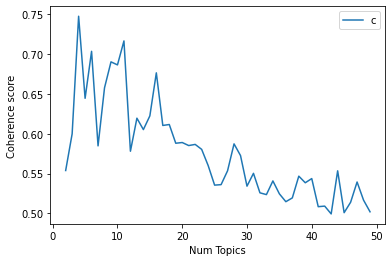

In [ ]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores


In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5539
Num Topics = 3  has Coherence Value of 0.6
Num Topics = 4  has Coherence Value of 0.7476
Num Topics = 5  has Coherence Value of 0.6446
Num Topics = 6  has Coherence Value of 0.7035
Num Topics = 7  has Coherence Value of 0.5849
Num Topics = 8  has Coherence Value of 0.6578
Num Topics = 9  has Coherence Value of 0.6903
Num Topics = 10  has Coherence Value of 0.6865
Num Topics = 11  has Coherence Value of 0.7166
Num Topics = 12  has Coherence Value of 0.5781
Num Topics = 13  has Coherence Value of 0.6196
Num Topics = 14  has Coherence Value of 0.6053
Num Topics = 15  has Coherence Value of 0.6225
Num Topics = 16  has Coherence Value of 0.6765
Num Topics = 17  has Coherence Value of 0.6105
Num Topics = 18  has Coherence Value of 0.6117
Num Topics = 19  has Coherence Value of 0.5882
Num Topics = 20  has Coherence Value of 0.5891
Num Topics = 21  has Coherence Value of 0.5853
Num Topics = 22  has Coherence Value of 0.5867
Num Topics = 23  has Coh

In [ ]:
# Select the model and print the topics
optimal_model = model_list[23]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(22,
  '0.041*"sizes" + 0.030*"mobile" + 0.023*"phone" + 0.018*"summary" + 0.017*"warranty" + 0.014*"service" + 0.011*"covered" + 0.009*"quality" + 0.009*"type" + 0.009*"installation"'),
 (17,
  '0.052*"analog" + 0.049*"watch" + 0.038*"great" + 0.037*"india" + 0.036*"discounts" + 0.029*"crystal" + 0.022*"bracelet" + 0.021*"strap" + 0.021*"women" + 0.021*"dial"'),
 (9,
  '0.072*"sticker" + 0.027*"wall" + 0.027*"stickers" + 0.013*"paper" + 0.013*"walldesign" + 0.013*"shapes" + 0.011*"description" + 0.010*"second" + 0.010*"ocean" + 0.008*"clock"'),
 (8,
  '0.039*"home" + 0.020*"best" + 0.018*"showpiece" + 0.016*"decor" + 0.013*"price" + 0.011*"indian" + 0.010*"plant" + 0.010*"exquisite" + 0.010*"room" + 0.009*"online"'),
 (4,
  '0.011*"device" + 0.009*"white" + 0.009*"price" + 0.009*"band" + 0.008*"high" + 0.008*"cover" + 0.008*"type" + 0.007*"book" + 0.007*"black" + 0.007*"light"'),
 (19,
  '0.024*"price" + 0.021*"comfort" + 0.012*"extra" + 0.011*"support" + 0.011*"wear" + 0.010*"comfor

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
24    -0.378144 -0.014346       1        1  15.449059
13     0.077261 -0.296802       2        1  13.106260
21    -0.249210 -0.314089       3        1   8.742327
10     0.065578 -0.088902       4        1   5.893601
1      0.172941 -0.050066       5        1   5.103771
12     0.126966 -0.156830       6        1   4.965414
0      0.098871 -0.034618       7        1   4.769149
6      0.152316 -0.016595       8        1   4.051658
4      0.077965  0.061683       9        1   3.321653
19     0.026602 -0.003152      10        1   3.243850
18     0.070487  0.094607      11        1   3.012441
22     0.056410  0.073794      12        1   2.910625
14     0.099510  0.081892      13        1   2.824628
16     0.091158  0.058177      14        1   2.563504
23     0.089448  0.010875      15        1   2.420977
8     -0.114234  0.082222      16        1   2.114322
5      0.010959  0.035389      17        1   2.058706
15     0.023543  0.052476      18        1   1.988296
3      0.026068 -0.001366      19        1   1.969303
2      0.020893 -0.040519      20        1   1.903531
11    -0.029720  0.136089      21        1   1.858124
17    -0.204224  0.019762      22        1   1.584506
9     -0.046226  0.099526      23        1   1.581337
20    -0.016503  0.100605      24        1   1.538416
7     -0.248715  0.110188      25        1   1.024544, topic_info=            Term         Freq        Total Category  logprob  loglift
469  flipkartcom  9517.000000  9517.000000  Default  30.0000  30.0000
486         cash  7605.000000  7605.000000  Default  29.0000  29.0000
495     shipping  7568.000000  7568.000000  Default  28.0000  28.0000
488      genuine  7664.000000  7664.000000  Default  27.0000  27.0000
83      delivery  7620.000000  7620.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
492  replacement    50.656569  6859.568596  Topic25  -4.7071  -0.3274
83      delivery    49.784774  7620.327606  Topic25  -4.7245  -0.4499
486         cash    47.951535  7605.684119  Topic25  -4.7620  -0.4855
495     shipping    46.072579  7568.736882  Topic25  -4.8020  -0.5206
489    guarantee    45.372334  6740.469090  Topic25  -4.8173  -0.4201

[1638 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
348       6  0.977780  0specifications
2110      6  0.983578  1specifications
4432      6  0.967911  2specifications
5144      6  0.940079  3specifications
5943     20  0.943394               40
...     ...       ...              ...
343      16  0.033124               ’s
343      17  0.104105               ’s
343      18  0.037856               ’s
343      19  0.023660               ’s
343      20  0.539453               ’s

[6190 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[25, 14, 22, 11, 2, 13, 1, 7, 5, 20, 19, 23, 15, 17, 24, 9, 6, 16, 4, 3, 12, 18, 10, 21, 8])

In [ ]:
# Save the topic distribution for each product title
topic_column_list = ['topic_' + str(i) for i in range(0,num_topics)]

maindf['bow'] = maindf['description'].apply(dictionary.doc2bow)
maindf['topic_distribution'] = maindf['bow'].apply(lambda row:lda.get_document_topics(row))


In [ ]:
maindf.head()

,product_name,description,category,bow,topic_distribution
0,alisha solid women's cycling shorts,"[package, bleach, code, gentle, wash, cycling,...",clothing,"[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1...","[(1, 0.115647726), (22, 0.8560695)]"
1,fabhomedecor fabric double sofa bed,"[cause, away, outdoor, either, water, required...",furniture,"[(4, 1), (9, 1), (10, 1), (12, 1), (20, 1), (2...","[(5, 0.7469784), (14, 0.057353746), (18, 0.185..."
2,aw bellies,"[mildew, surface, pair, occasion, heel, regula...",footwear,"[(4, 1), (6, 1), (9, 1), (11, 1), (12, 1), (14...","[(9, 0.6410593), (11, 0.3428488)]"
3,alisha solid women's cycling shorts,"[altght11, package, bleach, code, gentle, wash...",clothing,"[(0, 1), (1, 1), (3, 1), (4, 1), (5, 1), (6, 1...","[(22, 0.79884887), (25, 0.17286834)]"
4,sicons all purpose arnica dog shampoo,"[shampoo, form, package, purpose, liquid, gene...",pet supplies,"[(12, 1), (20, 1), (22, 1), (24, 1), (28, 1), ...","[(22, 0.5408771), (28, 0.41245627)]"


In [ ]:
for i, topic in zip(range(0, num_topics), topic_column_list):
    maindf[topic] = 0.0
    maindf[topic] = 0.0

def assign_topic_prob(row):
    for item in row['topic_distribution']:
        row['topic_'+str(item[0])] = item[1]
        #print(row['topic_'+str(item[0])])
    
    return row

maindf = maindf.apply(assign_topic_prob, axis=1)

In [ ]:
# Check the probability for the first 5 topics of the first 10 entries
maindf[['topic_0','topic_1','topic_2','topic_3','topic_4','topic_5','topic_6','topic_7','topic_8','topic_9']][:10]

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,0.0,0.115648,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.0,0.000000,0.000000,0.0,0.0,0.746978,0.0,0.0,0.0,0.000000
2,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.641059
3,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
5,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.978985
6,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
7,0.0,0.000000,0.010422,0.0,0.0,0.746787,0.0,0.0,0.0,0.000000
8,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.974561
9,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


In [ ]:
fp = open('flipkart-LDA-24topic.dat','wb')
pickle.dump(maindf,fp)
fp.close()

In [ ]:
fp = open('flipkart-LDA-24topic.dat','rb')
df = pickle.load(fp)
fp.close()

In [ ]:
df.head(1)

,product_name,description,category,bow,topic_distribution,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29
0,alisha solid women's cycling shorts,"[package, bleach, code, gentle, wash, cycling,...",clothing,"[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1...","[(1, 0.115647726), (22, 0.8560695)]",0.0,0.115648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.85607,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
fp = open('flipkart-LDA-24topic.dat','rb')
df = pickle.load(fp)
fp.close()